In [1]:
import pandas as pd

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Poem_classification - test_data.csv")


In [4]:
df

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

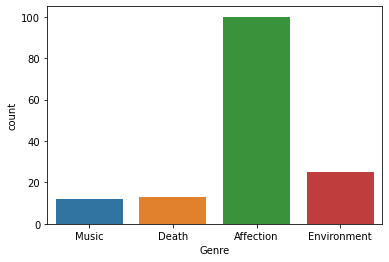

In [5]:
sns.countplot(df['Genre'])

In [6]:
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1,3))


In [7]:
features = vectorizer.fit_transform(df['Poem'].values)

In [8]:
features

<150x8847 sparse matrix of type '<class 'numpy.float64'>'
	with 10015 stored elements in Compressed Sparse Row format>

In [9]:
Cos_Sim = cosine_similarity(features)


In [10]:
Cos_Sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
len(Cos_Sim)

150

In [12]:
Cos_Sim[0]

array([1.        , 0.        , 0.        , 0.        , 0.01730585,
       0.01047722, 0.00429205, 0.        , 0.        , 0.00378481,
       0.        , 0.        , 0.        , 0.        , 0.00494144,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0185738 , 0.00462023, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01055808, 0.        ,
       0.        , 0.01138182, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00449492, 0.        ,
       0.00975451, 0.00872369, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01392402, 0.        , 0.01174649, 0.        , 0.        ,
       0.00386017, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00689044, 0.        , 0.     

In [13]:
type(Cos_Sim)

numpy.ndarray

In [14]:
print(df.loc[0,'Poem'])

A woman walks by the bench I’m sitting onwith her dog that looks part Lab, part Buick,stops and asks if I would like to dance.I smile, tell her of course I do. We decideon a waltz that she begins to hum.


In [15]:
Test = pd.DataFrame(list(enumerate(Cos_Sim[0])), columns = ['Poem_index','Similarity'])

In [16]:
Test

,Poem_index,Similarity
0,0,1.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.017306
...,...,...
145,145,0.000000
146,146,0.003991
147,147,0.000000
148,148,0.000000


In [17]:
Test.sort_values(by="Similarity",ascending=False)

,Poem_index,Similarity
0,0,1.000000
130,130,0.022652
101,101,0.019195
80,80,0.018707
25,25,0.018574
...,...,...
47,47,0.000000
46,46,0.000000
45,45,0.000000
44,44,0.000000


In [18]:
Test.loc[Test['Similarity']>0.02,:]

,Poem_index,Similarity
0,0,1.000000
130,130,0.022652


In [19]:
df.loc[130,'Poem']

'Arriving with throats like nipped roses, like a tiny bloom fastened to each neck, nothing else cuts the air quite like this thrum to make the small dog at my feet whine and yelp. So we wait—no excitement pinned to the sky so needled and our days open full of rain for weeks. Nothing yet'

In [20]:
Sim_List = []
for i in range(len(Cos_Sim)):
    for n,j in enumerate(Cos_Sim[i]):
        if (j >= 0.15) and (j< 0.99):
            Sim_List.append([i,n])

Sim_List

[[28, 79], [59, 61], [61, 59], [79, 28]]

In [21]:
def Print_Sims(Ind1,Ind2):
    print(f"1 - {df.loc[Ind1,'Poem']} \n2 - {df.loc[Ind2,'Poem']}\n********")

In [22]:
for Poems in Sim_List:
    Print_Sims(Poems[0],Poems[1])

1 -  I saw thee on thy bridal day—When a burning blush came o’er thee,Though happiness around thee lay,The world all love before thee: 
2 - How do I love thee? Let me count the ways. I love thee to the depth and breadth and height My soul can reach, when feeling out of sight For the ends of being and ideal grace. I love thee to the level of every day's Most quiet need, by sun and candle-light. I love thee
********
1 - Come to me in the silence of the night; Come in the speaking silence of a dream; Come with soft rounded cheeks and eyes as bright As sunlight on a stream;Come back in tears, O memory, hope, love of 
2 - Come when the nights are bright with starsOr when the moon is mellow; Come when the sun his golden barsDrops on the hay-field yellow. Come in the twilight soft and gray, Come in the night or come in the day, Come, O love, whene'er you may, 
********
1 - Come when the nights are bright with starsOr when the moon is mellow; Come when the sun his golden barsDrops on the hay-f

In [23]:
Cos_Sim[28]

array([0.        , 0.        , 0.00790382, 0.        , 0.        ,
       0.00983396, 0.        , 0.        , 0.00662234, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00987786,
       0.        , 0.00596875, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00307366, 0.01054722, 0.        , 1.        , 0.0096579 ,
       0.        , 0.00857209, 0.04625298, 0.        , 0.        ,
       0.00628446, 0.        , 0.01867034, 0.01161551, 0.00789433,
       0.02984163, 0.        , 0.        , 0.        , 0.00282757,
       0.0074316 , 0.00659283, 0.00307606, 0.        , 0.03887111,
       0.00645685, 0.00871927, 0.        , 0.0032582 , 0.01449641,
       0.006229  , 0.01359981, 0.        , 0.00287314, 0.00339465,
       0.05482812, 0.01865386, 0.00297947, 0.        , 0.02021154,
       0.00293738, 0.01339542, 0.        , 0.        , 0.00606638,
       0.04699716, 0.        , 0.00262162, 0.        , 0.01848

In [24]:
Test = pd.DataFrame(list(enumerate(Cos_Sim[28])), columns = ['Poem_index','Similarity'])

In [25]:
Test.sort_values(by="Similarity",ascending=False)

,Poem_index,Similarity
28,28,1.000000
79,79,0.208207
102,102,0.060568
60,60,0.054828
70,70,0.046997
...,...,...
57,57,0.000000
52,52,0.000000
48,48,0.000000
43,43,0.000000


In [26]:
music_corpus=[]

In [27]:
for msg in df[df['Genre']=='Music']['Poem'].tolist():
    for word in msg.split():
        music_corpus.append(word)

In [28]:
len(music_corpus)

553

In [29]:
music_corpus

['A',
 'woman',
 'walks',
 'by',
 'the',
 'bench',
 'I’m',
 'sitting',
 'onwith',
 'her',
 'dog',
 'that',
 'looks',
 'part',
 'Lab,',
 'part',
 'Buick,stops',
 'and',
 'asks',
 'if',
 'I',
 'would',
 'like',
 'to',
 'dance.I',
 'smile,',
 'tell',
 'her',
 'of',
 'course',
 'I',
 'do.',
 'We',
 'decideon',
 'a',
 'waltz',
 'that',
 'she',
 'begins',
 'to',
 'hum.',
 'Because',
 'I',
 'am',
 'a',
 'boy,',
 'the',
 'untouchability',
 'of',
 'beautyis',
 'my',
 'subject',
 'already,',
 'the',
 'book',
 'of',
 'statuesopen',
 'in',
 'my',
 'lap,',
 'the',
 'middle',
 'of',
 'October,',
 'leavesfoiling',
 'the',
 'wet',
 'groundin',
 'soft',
 'copper.',
 '“A',
 'statuemust',
 'be',
 'beautifulfrom',
 'all',
 'sides,”',
 'Cellini',
 'wrote',
 'in',
 '1558.When',
 'I',
 'close',
 'the',
 'book,the',
 'bodies',
 'touch.',
 'In',
 'the',
 'west,they',
 'are',
 'tying',
 'Because',
 'today',
 'we',
 'did',
 'not',
 'leave',
 'this',
 'world,We',
 'now',
 'embody',
 'a',
 'prominence',
 'within',

In [30]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


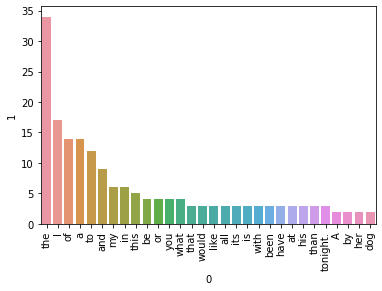

In [31]:
sns.barplot(pd.DataFrame(Counter(music_corpus).most_common(30))[0],
           pd.DataFrame(Counter(music_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [32]:
death_corpus=[]

In [33]:
for msg in df[df['Genre']=='Death']['Poem'].tolist():
    for word in msg.split():
        death_corpus.append(word)

In [34]:
len(death_corpus)

655

In [35]:
death_corpus

['Remember',
 'how',
 'we',
 'took',
 'those',
 'separate',
 'flights',
 'imagining',
 'the',
 'worst:',
 'our',
 'plane',
 'gone',
 'down,',
 'our',
 'children',
 'young,',
 'alone?',
 'I’d',
 'leave',
 'an',
 'hour',
 'before',
 'you,',
 'wait',
 'to',
 'meet',
 'you',
 'at',
 'your',
 'gate,',
 'or',
 'you’d',
 'go',
 'first,',
 'arrive',
 'and',
 'rent',
 'a',
 'car,',
 'then',
 'meet',
 'me',
 'at',
 'the',
 'exit.',
 'In',
 'between,',
 'blue',
 'emptiness,',
 'our',
 'lives',
 'suspended',
 'where',
 'clouds',
 'stacked',
 'themselves',
 'Since',
 'the',
 'phlox',
 'are',
 'dying',
 'and',
 'the',
 'daisies',
 'with',
 'their',
 'bright',
 'bodies',
 'have',
 'shattered',
 'in',
 'the',
 'wind,I',
 'go',
 'out',
 'among',
 'these',
 'last',
 'dancers,',
 'cutting',
 'to',
 'the',
 'ground',
 'the',
 'withered',
 'asters,',
 'the',
 'spent',
 'stalks',
 'of',
 'the',
 'lilies,',
 'the',
 'black',
 'rose,and',
 'see',
 'them',
 'as',
 'they',
 'were',
 'in',
 'spring,',
 'the',
 '

In [36]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


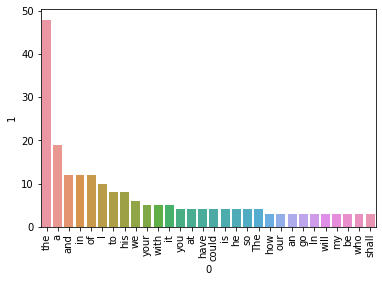

In [37]:
sns.barplot(pd.DataFrame(Counter(death_corpus).most_common(30))[0],
           pd.DataFrame(Counter(death_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [38]:
affection_corpus=[]

In [39]:
for msg in df[df['Genre']=='Affection']['Poem'].tolist():
    for word in msg.split():
        affection_corpus.append(word)

In [40]:
len(affection_corpus)

4851

In [41]:
affection_corpus

['"Tell',
 'me',
 'whom',
 'you',
 'love,',
 'and',
 'I’ll',
 'tell',
 'you',
 'who',
 'you',
 'are."',
 '–',
 'Creole',
 'ProverbThe',
 'man',
 'whose',
 'throat',
 'blossoms',
 'with',
 'spicy',
 'chocolatesTempers',
 'my',
 'ways',
 'of',
 'flurryingIs',
 'my',
 'inner',
 'recesses',
 'surfacingPaints',
 'the',
 'bedroom',
 'blue',
 'because',
 'he',
 'wants',
 'to',
 'carry',
 'me',
 'to',
 'the',
 'skiesPear',
 'eater',
 'in',
 'the',
 'orchardPossesses',
 'Whitmanesque',
 'urge',
 '&',
 'urgencyBoo',
 'for',
 'the',
 'Geechee',
 'Gullah',
 'Ring',
 'ShoutersOne',
 'of',
 'the',
 'women',
 'greeted',
 'me.I',
 'love',
 'you,',
 'she',
 'said.',
 'She',
 'didn’tKnow',
 'me,',
 'but',
 'I',
 'believed',
 'her,And',
 'a',
 'terrible',
 'new',
 'acheRolled',
 'over',
 'in',
 'my',
 'chest,Like',
 'in',
 'a',
 'room',
 'where',
 'the',
 'drapesHave',
 'been',
 'swept',
 'back.',
 'I',
 'love',
 'you,I',
 'love',
 'you,',
 'as',
 'For',
 'her',
 'this',
 'rhyme',
 'is',
 'penned,',
 'wh

In [42]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


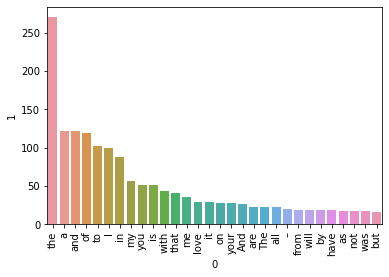

In [43]:
sns.barplot(pd.DataFrame(Counter(affection_corpus).most_common(30))[0],
           pd.DataFrame(Counter(affection_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

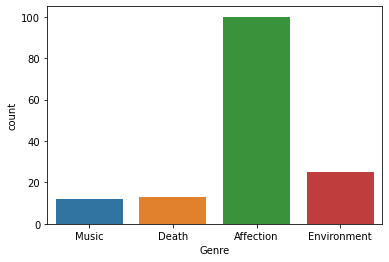

In [44]:
sns.countplot(df['Genre'])

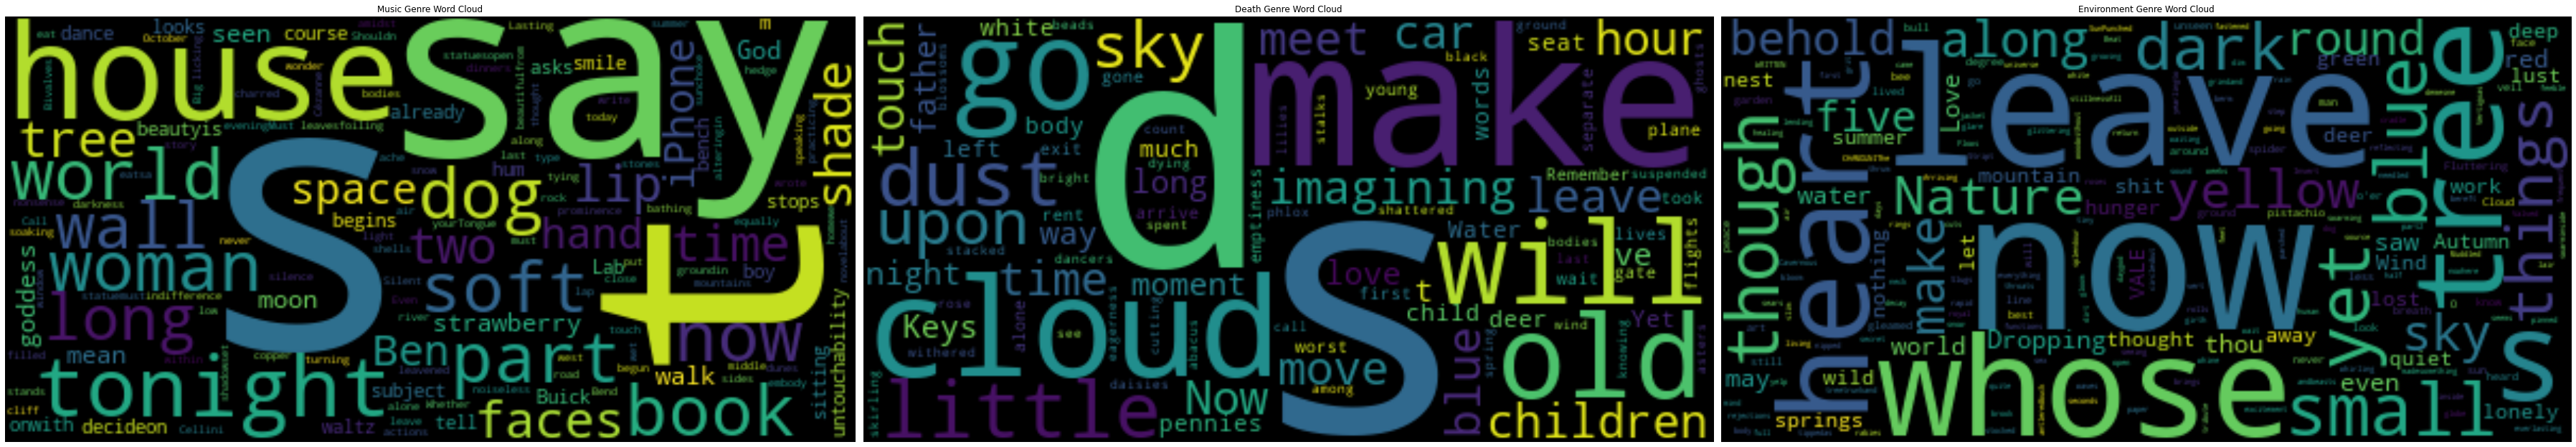

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

music_text = ' '.join(df[df.Genre == 'Music'].Poem.tolist())
death_text = ' '.join(df[df.Genre == 'Death'].Poem.tolist())
affection_text = ' '.join(df[df.Genre == 'Affection'].Poem.tolist())
environment_text=' '.join(df[df.Genre == 'Environment'].Poem.tolist())

# Create WordCloud objects for each sentiment
music_wordcloud = WordCloud().generate(music_text)
death_wordcloud = WordCloud().generate(death_text)
affection_wordcloud = WordCloud().generate(affection_text)
environmen_wordcloud = WordCloud().generate(environment_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(50, 15))

plt.subplot(131)
plt.imshow(music_wordcloud, interpolation='bilinear')
plt.title('Music Genre Word Cloud')
plt.axis('off')

plt.subplot(132)
plt.imshow(death_wordcloud, interpolation='bilinear')
plt.title('Death Genre Word Cloud')
plt.axis('off')

plt.subplot(133)
plt.imshow(affection_wordcloud, interpolation='bilinear')
plt.title('Affection Genre Word Cloud')
plt.axis('off')

plt.subplot(133)
plt.imshow(environmen_wordcloud, interpolation='bilinear')
plt.title('Environment Genre Word Cloud')
plt.axis('off')


# Show the subplots
plt.tight_layout()
plt.show()

In [46]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_lg')

In [47]:
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point

In [48]:
# Get the vector for 'text':
doc[-3], doc[-3].vector


(processing,
 array([-0.98158 , -2.6326  , -0.02352 ,  3.2856  ,  3.63    , -1.2795  ,
         3.6477  ,  4.1457  , -3.911   , -1.8988  ,  6.3144  ,  3.7014  ,
        -5.9561  ,  5.1211  , -1.8175  , -1.0002  ,  7.4333  ,  1.6981  ,
        -4.4509  , -1.9858  , -2.1477  ,  3.4198  , -5.8983  ,  1.8785  ,
        -3.4049  , -2.1389  , -0.63041 , -1.8979  ,  0.10881 , -0.63591 ,
         3.8009  ,  0.89979 , -4.6852  ,  0.17034 , -0.29025 , -5.6625  ,
         4.1363  ,  1.0943  ,  3.3971  ,  1.8353  ,  0.15847 , -0.96643 ,
         2.9794  , -0.68237 , -4.4391  ,  2.494   ,  4.9149  , -0.63641 ,
        -2.7878  , -2.0478  , -0.20991 ,  3.1249  , -1.678   , -5.3789  ,
        -2.6653  ,  0.82363 , -2.2348  ,  1.5312  ,  1.861   , -2.0801  ,
         4.343   ,  1.5988  , -2.3153  ,  0.62286 ,  3.0526  ,  1.7596  ,
        -3.0563  , -4.1593  , -1.0461  ,  0.62876 , -2.6396  ,  0.23815 ,
        -3.8904  ,  2.0345  , -1.1544  , -0.37425 , -5.1358  ,  3.371   ,
         0.90354 , -0.215

In [49]:
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector

array([ 0.13538204, -0.50049055,  0.26314098, -1.8586416 , -0.57580197,
       -0.07358702, -0.035399  ,  4.4508467 , -3.7474205 ,  1.6460339 ,
        6.90367   ,  1.3508627 , -2.7805922 , -0.6575441 ,  2.2817955 ,
        0.993958  ,  2.383111  , -0.21607213, -1.462939  ,  0.92183   ,
        1.0806081 ,  1.930987  , -3.292195  , -1.8399448 , -2.533392  ,
       -1.9827248 , -1.564382  , -1.138241  , -2.0831861 , -0.430525  ,
       -0.403931  , -0.11929995, -3.6540642 ,  0.19895704, -1.9910061 ,
        0.3238971 , -0.34544173,  0.969619  ,  5.6958246 ,  2.223509  ,
       -1.6114123 ,  2.346086  , -0.700554  , -1.539235  , -1.0771002 ,
        2.6830828 ,  3.4063332 , -2.901462  , -2.5829167 ,  1.1031249 ,
        1.362951  , -0.530291  ,  2.270077  , -4.8443303 , -1.537749  ,
        0.49870294,  2.492154  ,  1.8763611 ,  0.89088696,  0.88795805,
        4.37719   ,  0.06023499, -1.3463123 ,  0.22848296, -1.0967581 ,
        1.9763839 , -2.2734218 , -4.24074   ,  2.6045609 ,  3.91

In [50]:
embeddings=[]
for x in df.Poem:
    embeddings.append(nlp(x).vector)


In [51]:
embeddings[0]

array([-7.3316878e-01,  1.4337709e+00, -2.5446613e+00, -2.1947558e+00,
        4.6543938e-01,  1.1306227e+00, -1.4726283e-01,  3.6516972e+00,
       -1.6771393e+00,  2.1722507e+00,  5.6107607e+00,  2.0053210e+00,
       -1.9162008e+00,  5.4666644e-01,  2.3362103e+00, -4.9892079e-02,
        7.8428954e-01, -2.7813830e+00, -2.1831515e+00, -1.7543075e+00,
        2.2176201e+00,  3.3228975e-02, -2.1670055e-01, -2.4727929e+00,
       -1.8718147e-01, -1.7440879e+00, -2.7687736e+00,  7.4593745e-02,
       -2.0246783e-01,  6.0605490e-01,  4.0972424e-01, -2.7054813e+00,
        8.3611771e-02,  4.1468479e-02, -9.4458497e-01, -3.9496577e-01,
        9.4034627e-02,  1.4718041e-01,  2.3094137e+00,  7.5577617e-01,
       -1.1558100e-01,  1.9059347e-01,  5.2601320e-01, -8.7093467e-01,
       -3.7470523e-02,  1.6382718e+00, -6.3538194e-01, -2.6003811e+00,
       -1.0227770e+00,  1.8569281e+00,  7.0120029e-02,  9.0952837e-01,
        8.7842828e-01, -3.8550484e+00, -1.2883925e+00, -1.2453378e+00,
      

In [52]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [53]:
df.Poem

0      A woman walks by the bench I’m sitting onwith ...
1      Because I am a boy, the untouchability of beau...
2      Because today we did not leave this world,We n...
3      Big Bend has been here, been here. Shouldn’t i...
4      I put shells there, along the lip of the road....
                             ...                        
145    To pick a tulip from the garden, the red one. ...
146    We are as clouds that veil the midnight moon; ...
147    When pulled, the spider web took another form....
148    Whose woods these are I think I know. His hous...
149    you can make the maples blazejust by stopping ...
Name: Poem, Length: 150, dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [55]:
df['Genre']=le.fit_transform(df['Genre'])

In [56]:
from imblearn.over_sampling import SMOTE


# SMOTE

In [57]:
# Apply SMOTE to the TF-IDF feature space
smote = SMOTE(random_state=42)
X_sm,y_sm = smote.fit_resample(embeddings, df.Genre)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2)

In [59]:
y_train

282    2
203    1
138    2
349    3
272    2
      ..
179    1
62     0
345    3
112    0
67     0
Name: Genre, Length: 320, dtype: int32

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted) 
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    print('accuracy score',accuracy_score(y_true, y_predicted))
    print(classification_report(y_true,y_predicted))


C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score 0.9375
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.96        26
           3       0.84      1.00      0.91        16

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.95      0.94      0.93        80



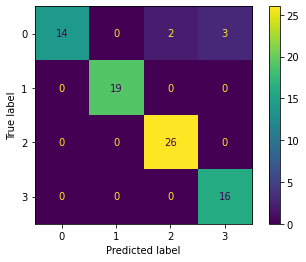

In [61]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(max_iter=100) 
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


eval_model(y_test, y_pred)


accuracy score 0.9375
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.95      0.95      0.95        19
           2       0.96      1.00      0.98        26
           3       0.89      1.00      0.94        16

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



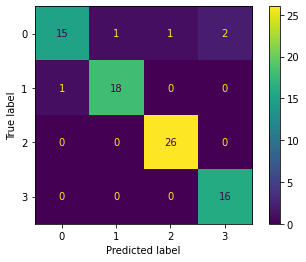

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

eval_model(y_test, rf_y_pred)


In [63]:
import xgboost as xgb

In [64]:
xgb_i=xgb.XGBClassifier()


accuracy score 0.9375
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       1.00      1.00      1.00        19
           2       0.87      1.00      0.93        26
           3       0.94      1.00      0.97        16

    accuracy                           0.94        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.94      0.94      0.93        80



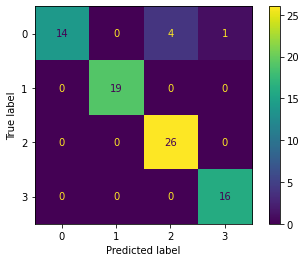

In [65]:
xgb_i.fit(X_train, y_train)

xgb_y_pred = xgb_i.predict(X_test)

eval_model(y_test, xgb_y_pred)

In [66]:
from sklearn.tree import DecisionTreeClassifier

accuracy score 0.775
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        19
           1       0.88      0.74      0.80        19
           2       0.86      0.92      0.89        26
           3       0.82      0.88      0.85        16

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



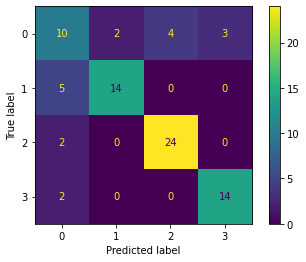

In [67]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

dtc_y_pred = dtc_model.predict(X_test)

eval_model(y_test, dtc_y_pred)


In [68]:
from sklearn.ensemble import ExtraTreesClassifier


In [69]:
clf_model = ExtraTreesClassifier(n_estimators=100, random_state=42)


accuracy score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        16

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



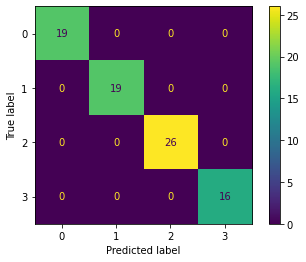

In [70]:
clf_model.fit(X_train, y_train)

clf_y_pred = clf_model.predict(X_test)

eval_model(y_test, clf_y_pred)


In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knc_model=KNeighborsClassifier()

accuracy score 0.7625
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.83      1.00      0.90        19
           2       0.86      0.96      0.91        26
           3       0.59      1.00      0.74        16

    accuracy                           0.76        80
   macro avg       0.82      0.75      0.66        80
weighted avg       0.83      0.76      0.68        80



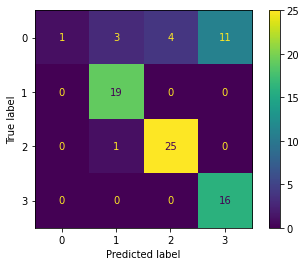

In [73]:
knc_model.fit(X_train, y_train)

knc_y_pred = knc_model.predict(X_test)

eval_model(y_test, knc_y_pred)
